In [1]:
data_path = '/Users/csxds/Library/CloudStorage/OneDrive-UniversityofBristol/Research/2022 CarbonQuanDRI/Data/STFC/'

In [2]:
file = f'{data_path}/R89 power.xlsx'

In [3]:
import pandas as pd

In [4]:
df = pd.read_excel(file, sheet_name='raw data', names=['mth','power'])

In [5]:
df.head(1)

,mth,power
0,0.682295,1059.545349


In [6]:
import datetime
from dateutil.relativedelta import relativedelta
from pandas.tseries.offsets import MonthEnd
def date_for_frac(frac, start='1/11/2020'):
    sd = datetime.datetime.strptime('1/11/2020','%d/%m/%Y').date()
    month_delta = int(frac)
    # find the next month
    next_month = sd + relativedelta(months=month_delta)

    # time in month
    time_in_month = (next_month + MonthEnd(1)) - (next_month - MonthEnd(1))
    within_month_part = frac - int(frac)
    date = time_in_month * within_month_part

    return date + next_month

In [7]:
date_for_frac(0.3)

datetime.date(2020, 11, 10)

In [8]:
df['date'] = df['mth'].apply(date_for_frac)

In [9]:
df['datetime'] = pd.to_datetime(df['date'])

In [10]:
df['datetime']

0     2020-11-21
1     2020-11-25
2     2020-11-30
3     2020-12-10
4     2020-12-12
         ...    
135   2022-10-26
136   2022-11-03
137   2022-11-07
138   2022-11-07
139   2022-11-15
Name: datetime, Length: 140, dtype: datetime64[ns]

Text(0.5, 0, '')

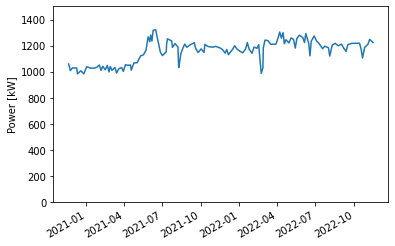

In [11]:
ax = df.plot(x="datetime", y="power", legend=False)
ax.set_ylim(0,1500)
ax.set_ylabel("Power [kW]")
ax.set_xlabel("")

In [13]:
df['power'].describe()

count     140.000000
mean     1160.173710
std        85.824908
min       983.824705
25%      1116.689745
50%      1182.415830
75%      1217.771202
max      1321.685809
Name: power, dtype: float64

In [39]:
fig = ax.get_figure()
fig.savefig('energy_R89.pdf')

In [15]:
df_PUE = pd.read_excel(file, sheet_name='raw PUE', names=['mth','PUE'])

In [16]:
df_PUE['date'] = df_PUE['mth'].apply(date_for_frac)
df_PUE['datetime'] = pd.to_datetime(df_PUE['date'])

Text(0.5, 0, '')

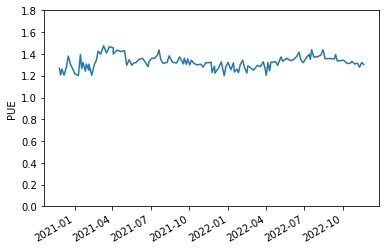

In [46]:
ax = df_PUE.plot(x="datetime", y="PUE", legend=False)
ax.set_ylim(0,1.8)
ax.set_ylabel("PUE")
ax.set_xlabel("")

In [47]:
fig = ax.get_figure()
fig.savefig('PUE_R89.pdf')

In [17]:
df_PUE['PUE'].describe()

count    134.000000
mean       1.324427
std        0.059586
min        1.200780
25%        1.292170
50%        1.320258
75%        1.358117
max        1.474943
Name: PUE, dtype: float64

# Join both

In [105]:
df_power = df.set_index('datetime')

In [106]:
df_power = df_power[~df_power.index.duplicated(keep='first')]['power']

In [107]:
df_power.resample('D').interpolate().reindex(pd.date_range('2020-11-21', '2022-11-01', freq='MS'))

2020-12-01    1029.457602
2021-01-01    1023.111127
2021-02-01    1048.807836
2021-03-01    1033.077094
2021-04-01    1012.904966
2021-05-01    1068.800831
2021-06-01    1240.157005
2021-07-01    1129.449179
2021-08-01    1216.077305
2021-09-01    1194.767275
2021-10-01    1171.310560
2021-11-01    1190.476535
2021-12-01    1163.243867
2022-01-01    1160.770475
2022-02-01    1151.050581
2022-03-01    1212.578526
2022-04-01    1239.088553
2022-05-01    1236.259500
2022-06-01    1261.777081
2022-07-01    1254.381504
2022-08-01    1183.771799
2022-09-01    1211.460981
2022-10-01    1217.529698
2022-11-01    1205.208974
Freq: MS, Name: power, dtype: float64

In [119]:
df_PUE = df_PUE[~df_PUE.index.duplicated(keep='first')]['PUE']
df_PUE.resample('D').interpolate().reindex(pd.date_range('2020-11-21', '2022-11-01', freq='MS'))

KeyError: 'PUE'

In [118]:
df = pd.concat([df_PUE, df_power], axis=1).interpolate()

In [120]:
df

,PUE,power
datetime,,
2020-11-21,NaN,1059.545349
2020-11-25,NaN,1008.834983
2020-11-26,1.268622,1015.717260
2020-11-29,1.207978,1022.599537
2020-11-30,1.234640,1029.481814
...,...,...
2022-11-05,1.315285,1229.994217
2022-11-07,1.297357,1248.214143
2022-11-10,1.279429,1235.909203


In [121]:
df['tot_power'] = df['PUE'] * df['power']

In [141]:
df.to_csv('R89.csv')

In [128]:
df = df.dropna().resample('D').interpolate()

In [129]:
df['energy'] = df['tot_power'] * 24

<AxesSubplot:>

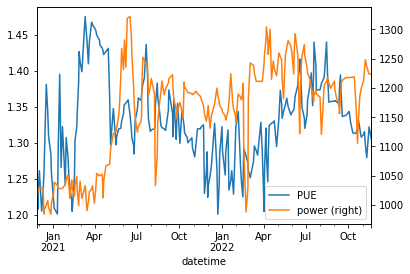

In [137]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

df[['PUE']].plot(ax=ax)
df[['power']].plot(ax=ax,secondary_y=True)

In [139]:
df['energy']['2021-01-01':'2022-12-31'].sum()

13256974.583646948

In [140]:
df['energy'].tail()

datetime
2022-11-16    38720.118254
2022-11-17    38617.879198
2022-11-18    38515.640143
2022-11-19    38413.401087
2022-11-20    38311.162031
Freq: D, Name: energy, dtype: float64